In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [4]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

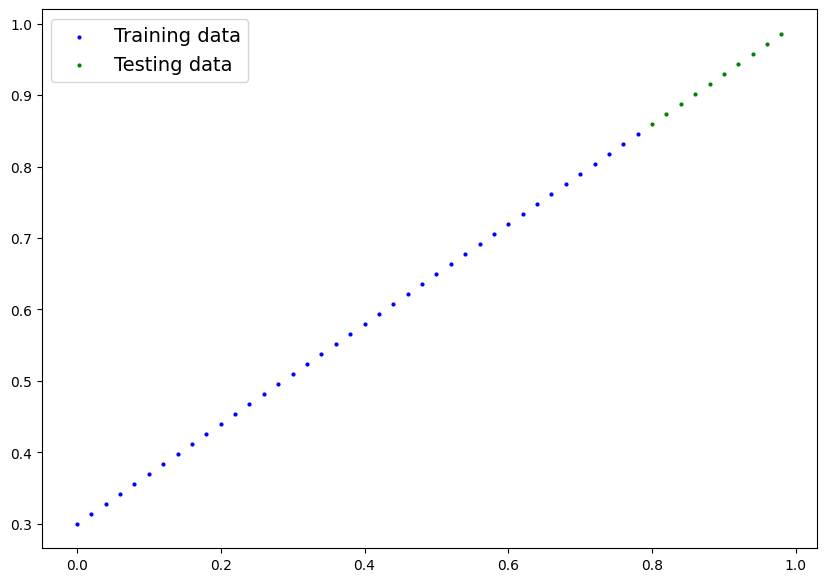

In [7]:
plot_predictions();

In [19]:
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = torch.nn.Parameter(
            torch.randn(1, dtype=torch.float32),
            requires_grad=True
        )
        self.bias = nn.Parameter(
            torch.randn(1, dtype=torch.float32),
            requires_grad=True
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [20]:
torch.manual_seed(42)

linearRegressionModel = LinearRegressionModel()

list(linearRegressionModel.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
linearRegressionModel.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
    y_predictions = linearRegressionModel(X_test)
    print(y_predictions)

# 랜덤한 weight, bias 로 예측하기 때문에 예측값이 정답과의 유사도가 높지 않음
# 학습을 진행해야 함!

# 학습은 loss function, optimizer 를 통해 진행함!
# loss function : 모델이 예측한 값과 실제 값의 차이를 계산하는 함수
# optimizer : 모델의 내부 텐서의 파라미터를 어떻게 업데이트 할 것인가 ?

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


In [18]:
# Mean Absolute Error : 예측값과 실제값의 차이의 절대값의 평균
mae_loss_function = nn.L1Loss()

optimizer = torch.optim.SGD(
    params=linearRegressionModel.parameters(),
    lr=0.01
)